In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

#### Case Folding

In [3]:
sentence = "Pemerintah mnerapkan PSBB untuk menangani Virus Corona."

# gunakan fungsi .lower()
lowercase_sentence = sentence.lower()

print(lowercase_sentence)

pemerintah mnerapkan psbb untuk menangani virus corona.


#### Tokenizing

In [9]:
import string 
import re #regex library

# import word_tokenize from NLTK
from nltk.tokenize import word_tokenize 



# sentence input
sentence = "Sebelumnya, \n kasus positif virus Corona pada 24 April sebanyak 8.211 orang. \n Jumlah pasien sembuh Corona di RI ada 1.002 orang dan meninggal 689 orang."



# ------ Case Folding --------
# gunakan fungsi .lower()
lowercase_sentence = sentence.lower()

print('Case Folding Result :')
print(lowercase_sentence)
print('\n')

# ------ Tokenizing ---------
#remove angka
lowercase_sentence = re.sub(r"\d+", "", lowercase_sentence)

#remove punctuation
lowercase_sentence = lowercase_sentence.translate(str.maketrans("","",string.punctuation))

#remove whitespace leading & trailing
lowercase_sentence = lowercase_sentence.strip()

#remove multiple whitespace into single whitespace
lowercase_sentence = re.sub('\s+',' ',lowercase_sentence)


tokens = nltk.tokenize.word_tokenize(lowercase_sentence)

print('Tokenizing Result :') 
print(tokens)

Case Folding Result :
sebelumnya, 
 kasus positif virus corona pada 24 april sebanyak 8.211 orang. 
 jumlah pasien sembuh corona di ri ada 1.002 orang dan meninggal 689 orang.


Tokenizing Result :
['sebelumnya', 'kasus', 'positif', 'virus', 'corona', 'pada', 'april', 'sebanyak', 'orang', 'jumlah', 'pasien', 'sembuh', 'corona', 'di', 'ri', 'ada', 'orang', 'dan', 'meninggal', 'orang']


In [10]:
freq_tokens = nltk.FreqDist(tokens)

print('Frequency Tokens :') 
print(freq_tokens.most_common())

Frequency Tokens :
[('orang', 3), ('corona', 2), ('sebelumnya', 1), ('kasus', 1), ('positif', 1), ('virus', 1), ('pada', 1), ('april', 1), ('sebanyak', 1), ('jumlah', 1), ('pasien', 1), ('sembuh', 1), ('di', 1), ('ri', 1), ('ada', 1), ('dan', 1), ('meninggal', 1)]


<Axes: xlabel='Key'>

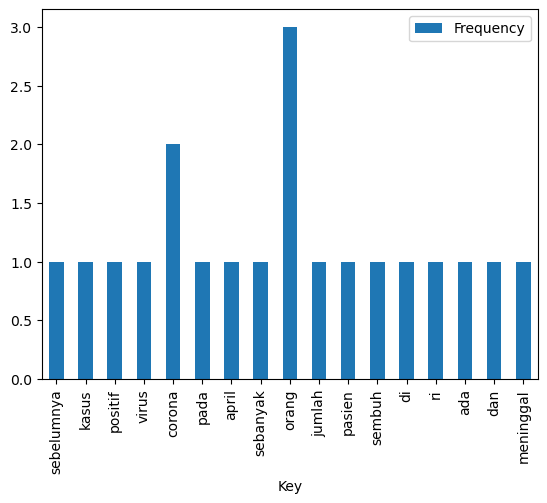

In [11]:
import pandas as pd

df_freq_tokens = pd.DataFrame.from_dict(freq_tokens, orient='index')
df_freq_tokens.columns = ['Frequency']
df_freq_tokens.index.name = 'Key'

df_freq_tokens.plot(kind='bar')

#### Stopwords removal

In [12]:
from nltk.corpus import stopwords

# tokenize text
freq_tokens

# get Indonesian stopword 
list_stopwords = set(stopwords.words('indonesian'))

#remove stopword pada list token
tokens_without_stopword = [word for word in freq_tokens if not word in list_stopwords]


print(tokens_without_stopword)

['orang', 'corona', 'positif', 'virus', 'april', 'pasien', 'sembuh', 'ri', 'meninggal']


#### Stemming

In [13]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# token without stopword
list_tokens = tokens_without_stopword

# stem
output   = [(token + " : " + stemmer.stem(token)) for token in list_tokens]

output

['orang : orang',
 'corona : corona',
 'positif : positif',
 'virus : virus',
 'april : april',
 'pasien : pasien',
 'sembuh : sembuh',
 'ri : ri',
 'meninggal : tinggal']